# Advance Regression Assignment

In [ ]:
import numpy as np
import pandas as pd
##import seaborn as sns
##from scipy.stats import boxcox
import matplotlib
import matplotlib.pyplot as plt
import math

import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv('train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#finding the number of rows and columns imported in the dataframe
housing.shape

(1460, 81)

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning and Minipulation

In [6]:
##Function to drop columns that have one single unique value in them as these attributes will not have significant input to the analysis

def dropcolsingleunique(df):
    '''
    df : Dataframe that needs to be manipulated
    '''
    
    df_sgun = df.copy()
    unique_col = df_sgun.nunique() == 1
    col_list_uniquevalue = list(unique_col[unique_col.values == True].index)
    df_sgun.drop(col_list_uniquevalue,axis=1,inplace=True)
    print('Total Number of Columns dropped : {}'.format(len(col_list_uniquevalue)))
    return df_sgun

In [7]:
housing = dropcolsingleunique(housing)

Total Number of Columns dropped : 0


In [8]:
##Dropping column Id as it is a record identifier and is unique for all the records 
housing.drop(['Id'],axis = 1,inplace = True)

In [9]:
# % of missing values column wise
round(housing.isna().sum() / len(housing.index) * 100 ,2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [10]:
##Lets drop the columns with high % of Nan Values

housing.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

<b> - Checking the  distribution of target variable SalePrice </b>

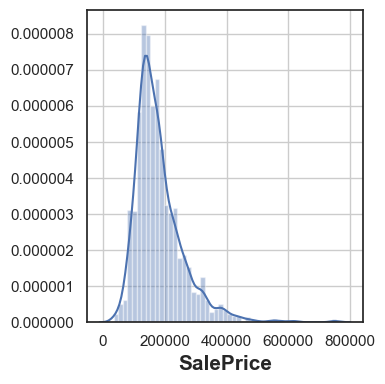

In [11]:
sns.set(style='white')
plt.figure(figsize=(4,4), dpi=100)
sns.distplot(housing.SalePrice,hist= True,color="b")

plt.xlabel('SalePrice', fontsize= 15, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

The  target variable is positively skwed ,lets perform transformation on the same to align it in gausian distribution so as not to miss out on high price houses by excluding outliers

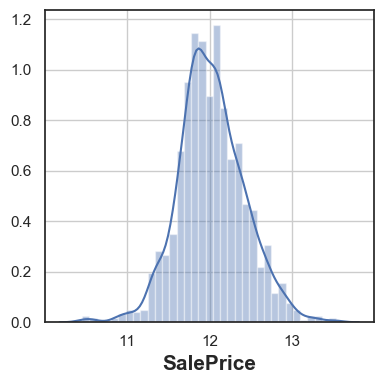

In [12]:
sns.set(style='white')
plt.figure(figsize=(4,4), dpi=100)
sns.distplot(np.log(housing.SalePrice),hist= True,color="b")

plt.xlabel('SalePrice', fontsize= 15, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

So taking the log of the target column brings out the gausian distribution of the target variable , lets transform the target varaile 

In [13]:
housing.SalePrice = np.log(housing.SalePrice)

In [14]:
housing.shape

(1460, 77)

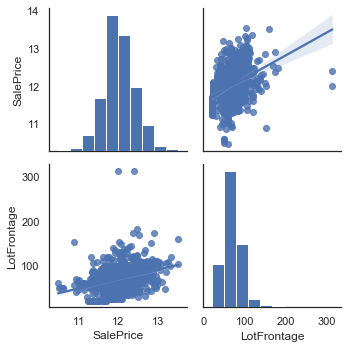

In [15]:
#Lets see if LotFrontage is having any relation  with salesprice
sns.pairplot(housing[['SalePrice','LotFrontage']] , kind = "reg")

plt.tight_layout()
plt.show()

In [16]:
##Imputing NA's with Median as the data is skwed 
housing.loc[:, 'LotFrontage'] = housing.loc[:, 'LotFrontage'].fillna(housing.LotFrontage.median())

<b> -Lets go through the data dictonary to manipulate all the categoricals and numerical variables </b>

In [17]:
##Dropping the record where column Electrical is NA as there is only one record
housing = housing[housing['Electrical'].notna()]

In [18]:
housing[['BsmtCond','BsmtQual' ,'BsmtExposure','BsmtFinType1' , 'BsmtFinType2']].isna().sum()

BsmtCond        37
BsmtQual        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [19]:
##As per the data dictionary NA in column Alley means NO alley acces , lets fill then with value NAA

housing['Alley'].fillna('NAA' , inplace = True)

In [20]:
###As per the Data dictionary NA in the column BsmtQual,BsmtCond ,BsmtExposure,BsmtFinType1,BsmtFinType2 means NO Basement , replacing Nan records with NB instead

housing['BsmtQual'].fillna('NB' , inplace = True)
housing['BsmtCond'].fillna('NB' , inplace = True)
housing['BsmtExposure'].fillna('NB' , inplace = True)
housing['BsmtFinType1'].fillna('NB' , inplace = True)
housing['BsmtFinType2'].fillna('NB' , inplace = True)

In [21]:
housing[['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1' , 'BsmtFinType2']].isna().sum()

BsmtCond        0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [22]:
###As per the Data dictionary NA in the column FireplaceQu means no fireplace replacing the NA value with NF (No Fireplace)

housing['FireplaceQu'].fillna('NF' , inplace = True)

In [23]:
###As per the Data dictionary NA in the column GarageType,GarageFinish,GarageQual,GarageCond means no garage replacing the NA value with NG (No Garage)

housing['GarageType'].fillna('NG' , inplace = True)
housing['GarageFinish'].fillna('NG' , inplace = True)
housing['GarageQual'].fillna('NG' , inplace = True)
housing['GarageCond'].fillna('NG' , inplace = True)


In [24]:
## Imputing NA's in GarageYrBlt with 0 as these records represent that there is no garage in the house
housing['GarageYrBlt'].fillna(0 , inplace = True)

<b> - Lets check how values in categorical columns are distribiuted for Data Manipulation </b>

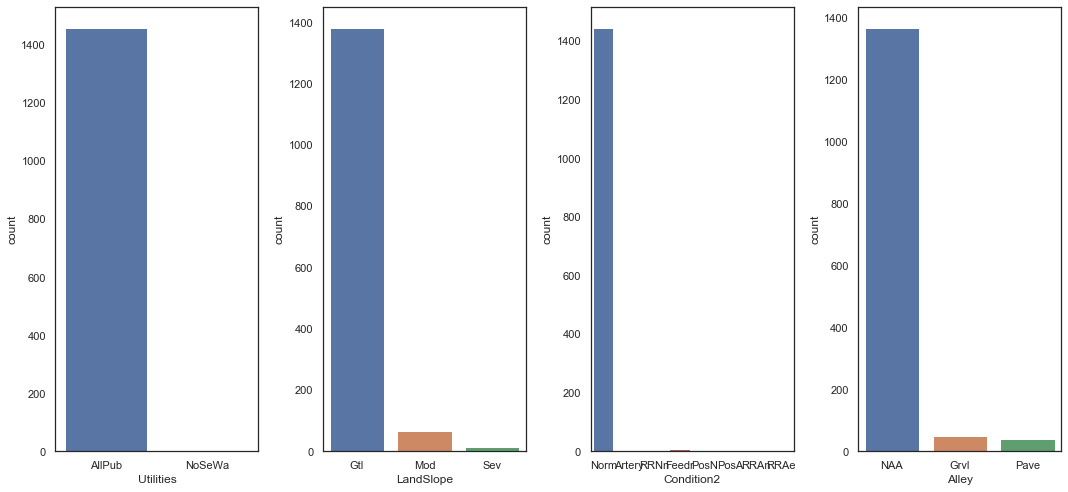

In [25]:
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1,4,1)
sns.countplot(housing.Utilities)

plt.subplot(1,4,2)
sns.countplot(housing.LandSlope)

plt.subplot(1,4,3)
sns.countplot(housing.Condition2)

plt.subplot(1,4,4)
sns.countplot(housing.Alley)


plt.tight_layout()
plt.show()

In [26]:
##Dropping columns Utilities , LandSlope and Condition2 as the column is highly skwed and wont help in Regression analysis
housing.drop(['Utilities' ,'LandSlope' ,'Condition2','Alley'],axis = 1 , inplace=True)

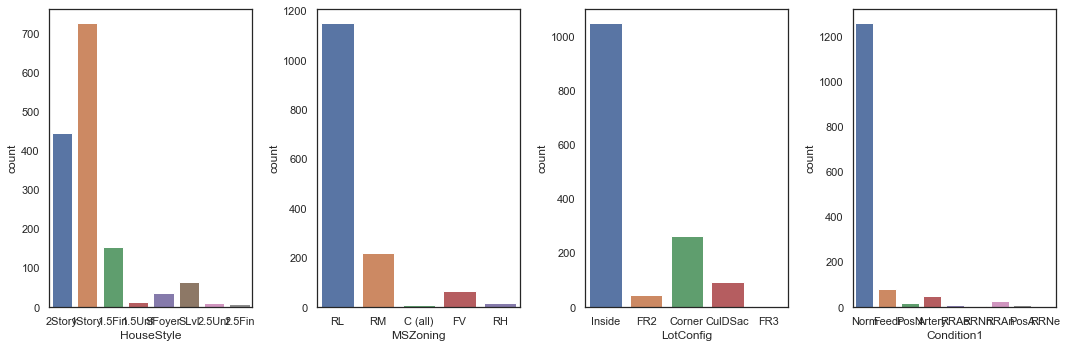

In [27]:
plt.figure(figsize=(15,5))
sns.set(style='white')

plt.subplot(1,4,1)
sns.countplot(housing.HouseStyle)

plt.subplot(1,4,2)
sns.countplot(housing.MSZoning)


plt.subplot(1,4,3)
sns.countplot(housing.LotConfig)


plt.subplot(1,4,4)
sns.countplot(housing.Condition1)


plt.tight_layout()
plt.show()

In [28]:
##Based on the above inference lets combine the categorical values that have less data to improve the distribution of the categories 

housing['HouseStyle'].replace(to_replace=['1.5Unf','2.5Unf'],value='Unf',inplace=True)
housing['HouseStyle'].replace(to_replace=['2.5Fin','1.5Fin'],value='Fin',inplace=True)

housing['MSZoning'].replace(to_replace=['FV','RH','RL','RP','RM'],value='Residentail',inplace=True)
housing['MSZoning'].replace(to_replace=['A','C (all)','I'],value='Non-Residentail',inplace=True)

housing['Condition1'].replace(to_replace=['RRAe','PosA','RRNn','RRNe'], value = 'Other',inplace=True)

housing['LotConfig'].replace(to_replace=['FR2','FR3'], value = 'FR2+FR3',inplace=True)

In [29]:
##Roof Attributes

housing.RoofStyle.value_counts()/len(housing)

housing['Condition1'].replace(to_replace=['Mansard','Mansard'], value = 'Other',inplace=True)

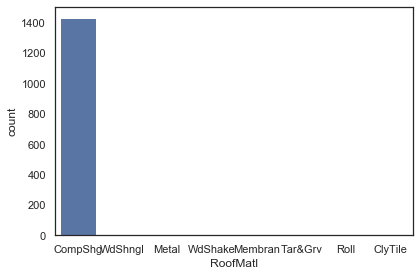

In [30]:
housing.RoofMatl.value_counts()/len(housing)
sns.countplot(housing.RoofMatl)


plt.tight_layout()
plt.show()

In [31]:
##Dropping column RoofMatl as the data is highly skwed

housing.drop(['RoofMatl'],axis = 1 , inplace = True)

<b> - Variables representing exterior coverings of the house </b>

In [32]:
housing.Exterior1st.value_counts()/len(housing)
housing['Exterior1st'].replace(to_replace=['Stone','BrkComm','CBlock','ImStucc','AsphShn'], value = 'Other',inplace=True)

In [33]:
housing.Exterior2nd.value_counts()/len(housing)
housing['Exterior2nd'].replace(to_replace=['CBlock','AsphShn','Brk Cmn','Stone','ImStucc'], value = 'Other',inplace=True)

In [34]:
housing.MasVnrType.isna().sum()

8

In [35]:
##Lets remove records where MasVnrType is null

housing = housing[~pd.isnull(housing['MasVnrType'])]

In [36]:
## As shown below there are no more Nan's in the dataset
housing.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType  

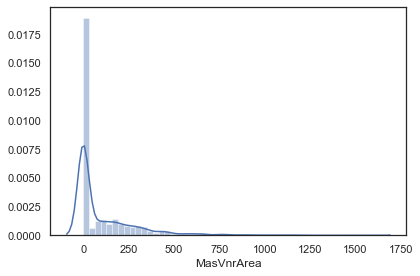

In [37]:
sns.distplot(housing.MasVnrArea)

plt.tight_layout()
plt.show()

In [38]:
###lets drop the column MasVnrArea as 50% of the records have value as 0

housing.drop(['MasVnrArea'],axis =1 , inplace = True)

In [39]:
##Exterior qulaity material varaibles are categorical and can be converted into ordered numerical data.
housing['ExterQual']=housing['ExterQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
housing['ExterCond']=housing['ExterCond'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})

##Basement Qulaity check variables are categoricals and can be converted to ordered numerical data 
housing['BsmtQual']=housing['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NB':0})
housing['BsmtCond']=housing['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NB':0})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Gd':5, 'Av':4, 'Mn':3, 'Fa':2, 'No':1, 'NB':0})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NB':0})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NB':0})

In [40]:
sum(housing.BsmtFinSF1 + housing.BsmtFinSF2 +housing.BsmtUnfSF )

1532706

In [41]:
sum(housing.TotalBsmtSF)

1532706

In [42]:
## so housing.BsmtFinSF1 + housing.BsmtFinSF2 +housing.BsmtUnfSF = housing.TotalBsmtSF
## lets drop housing.BsmtFinSF1 + housing.BsmtFinSF2 +housing.BsmtUnfSF columns as they can be explained by housing.TotalBsmtSF
housing.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis = 1 , inplace = True)

<b> -Heating features </b>

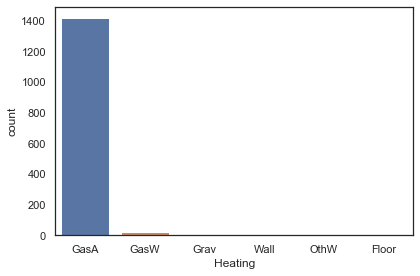

In [43]:

sns.countplot(housing.Heating)

plt.tight_layout()
plt.show()

In [44]:
##Lets drop heating feature as it is highly skwed 
housing.drop(['Heating'],axis = 1,inplace = True)

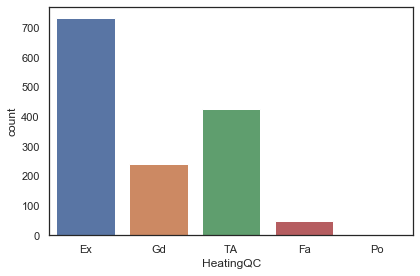

In [45]:
sns.countplot(housing.HeatingQC)

plt.tight_layout()
plt.show()

In [46]:
##HeatingQC check variables are categoricals and can be converted to ordered numerical data 
housing['HeatingQC']=housing['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':1, 'Po':0})

In [47]:
housing['CentralAir']=housing['CentralAir'].map({'Y':1,'N':0})

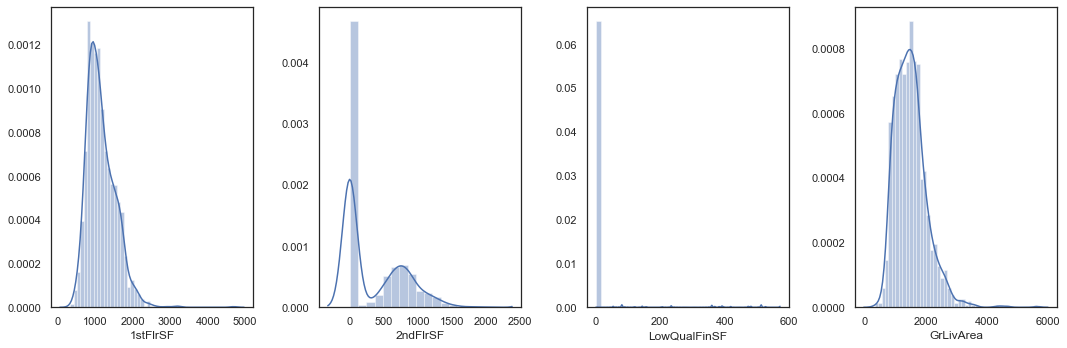

In [48]:
plt.figure(figsize=(15,5))
sns.set(style='white')

plt.subplot(1,4,1)
sns.distplot(housing['1stFlrSF'])

plt.subplot(1,4,2)
sns.distplot(housing['2ndFlrSF'])


plt.subplot(1,4,3)
sns.distplot(housing['LowQualFinSF'],kde_kws={'bw':0.1})


plt.subplot(1,4,4)
sns.distplot(housing['GrLivArea'])

plt.tight_layout()
plt.show()

In [49]:
##Dropping column LowQualFinSF as it is highly skwed

housing.drop(['LowQualFinSF'],axis = 1 , inplace = True)

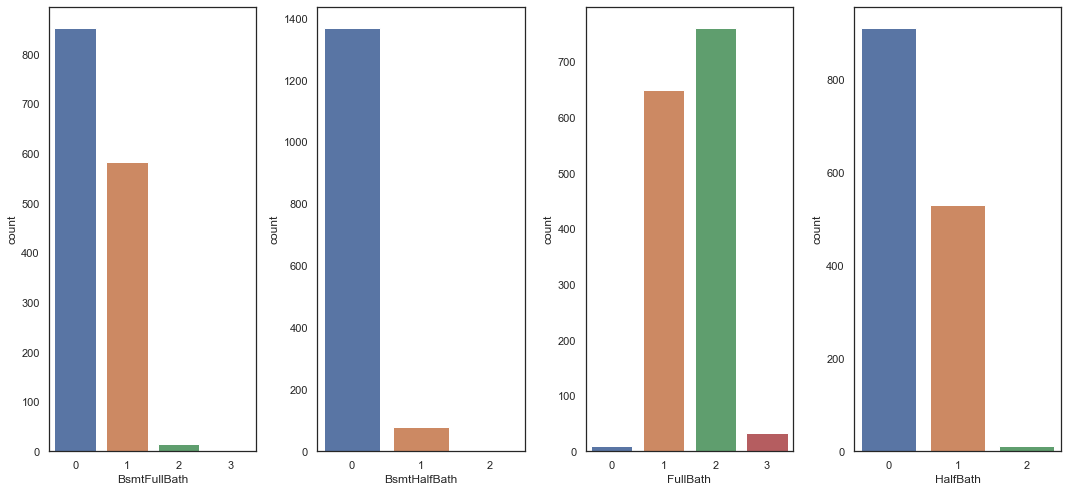

In [50]:
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1,4,1)
sns.countplot(housing.BsmtFullBath)

plt.subplot(1,4,2)
sns.countplot(housing.BsmtHalfBath)

plt.subplot(1,4,3)
sns.countplot(housing.FullBath)

plt.subplot(1,4,4)
sns.countplot(housing.HalfBath)


plt.tight_layout()
plt.show()

In [51]:
##KitchenQual variables are categoricals and can be converted to ordered numerical data 

housing['KitchenQual'] = housing['KitchenQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})

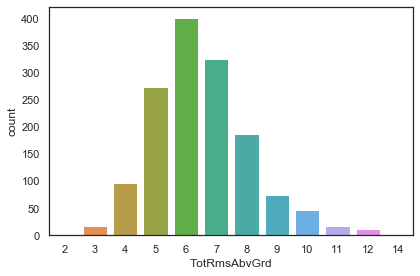

In [52]:
### checking the distribution of TotRmsAbvGrd
sns.countplot(housing.TotRmsAbvGrd)

plt.tight_layout()
plt.show()

##the count plot looks ok

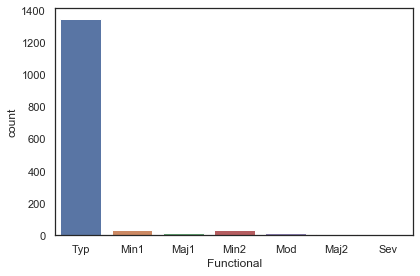

In [53]:
sns.countplot(housing.Functional)

plt.tight_layout()
plt.show()

In [54]:
housing.Functional.value_counts()/len(housing)

Typ     0.931771
Min2    0.023432
Min1    0.021365
Mod     0.010338
Maj1    0.008959
Maj2    0.003446
Sev     0.000689
Name: Functional, dtype: float64

In [55]:
## variiable functioncal  is highly skwed so lets drop the same 
housing.drop(['Functional'],axis = 1 , inplace = True)

In [56]:
##FireplaceQu variables are categoricals and can be converted to ordered numerical data 

housing.FireplaceQu.value_counts()

housing['FireplaceQu'] = housing['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NF':0})

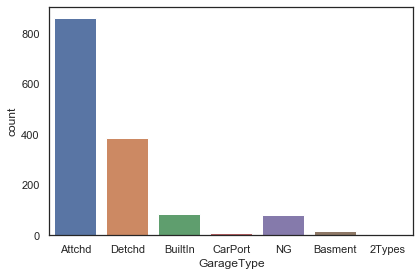

In [57]:
sns.countplot(housing.GarageType)

plt.tight_layout()
plt.show()

In [58]:
housing.GarageType.value_counts()/len(housing)

housing['GarageType'].replace(to_replace=['CarPort','2Types'], value = 'Car+2Type',inplace=True)

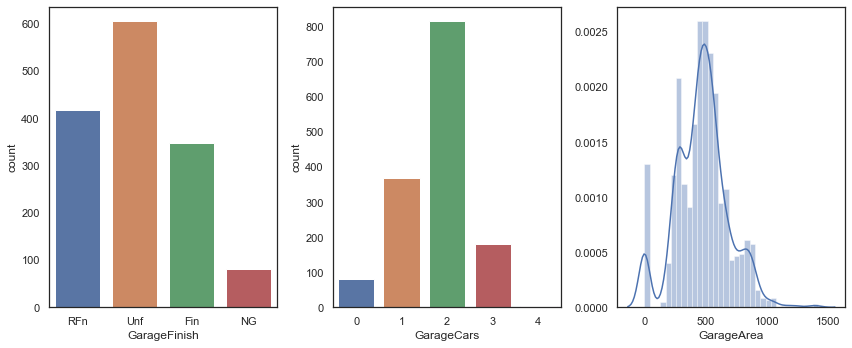

In [59]:
plt.figure(figsize=(12,5))
sns.set(style='white')

plt.subplot(1,3,1)
sns.countplot(housing.GarageFinish)

plt.subplot(1,3,2)
sns.countplot(housing.GarageCars)

plt.subplot(1,3,3)
sns.distplot(housing.GarageArea)

plt.tight_layout()
plt.show()

In [60]:
##Converting the categorical variables GarageQual , GarageCond & PavedDrive into numerical

housing['GarageQual'] = housing['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NG':0})
housing['GarageCond'] = housing['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NG':0})

housing['PavedDrive'] = housing['PavedDrive'].map({ 'Y':2, 'N':1, 'P':0})

In [61]:
housing.PavedDrive.value_counts()

2    1331
1      90
0      30
Name: PavedDrive, dtype: int64

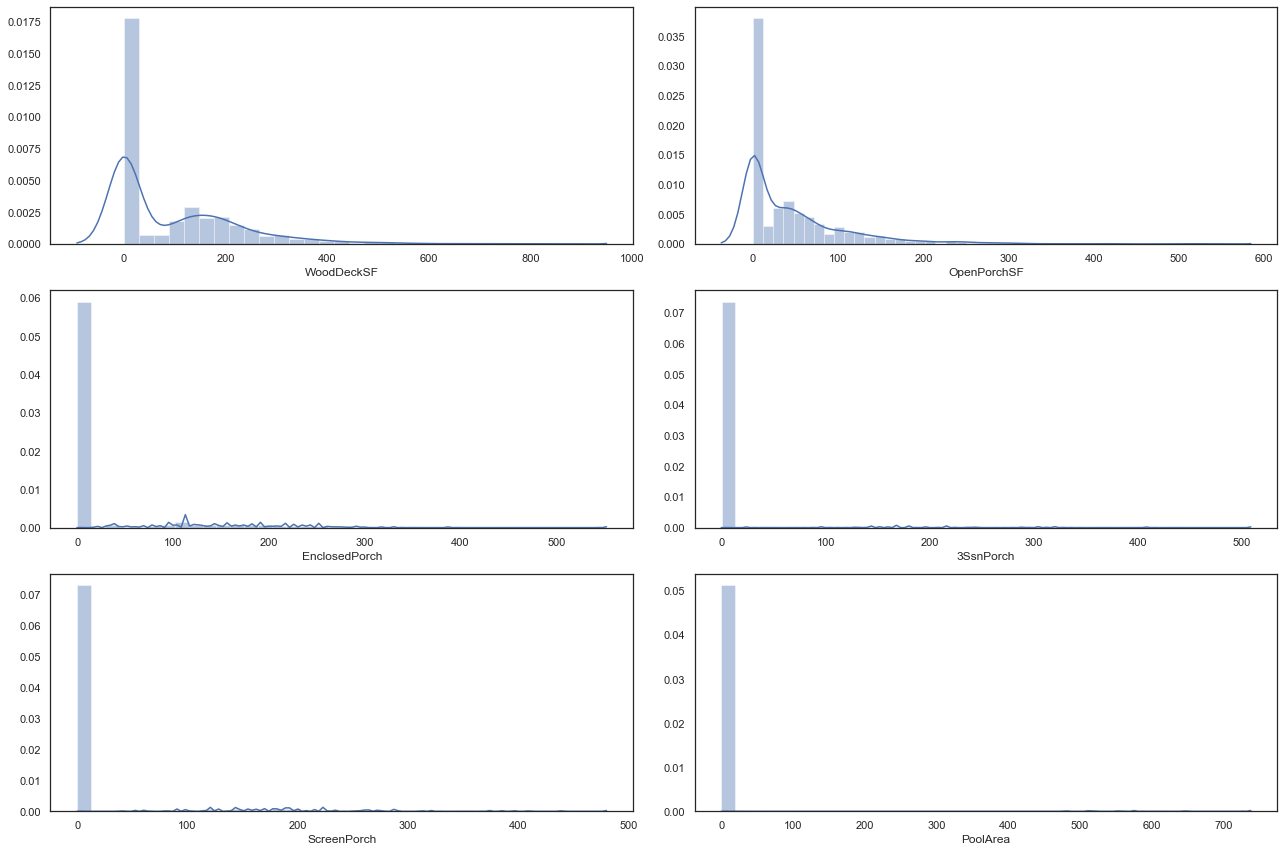

In [62]:
plt.figure(figsize=(18,12))
sns.set(style='white')

plt.subplot(3,2,1)
sns.distplot(housing.WoodDeckSF)

plt.subplot(3,2,2)
sns.distplot(housing.OpenPorchSF)

plt.subplot(3,2,3)
sns.distplot(housing.EnclosedPorch,kde_kws={'bw':0.1})

plt.subplot(3,2,4)
sns.distplot(housing['3SsnPorch'],kde_kws={'bw':0.1})

plt.subplot(3,2,5)
sns.distplot(housing.ScreenPorch,kde_kws={'bw':0.1})

plt.subplot(3,2,6)
sns.distplot(housing.PoolArea,kde_kws={'bw':0.1})

plt.tight_layout()
plt.show()

In [63]:
##Dropping columns EnclosedPorch,3SsnPorch , ScreenPorch & PoolArea , are highly skwed ;lets drop them.

housing.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'] , axis = 1 ,inplace = True )

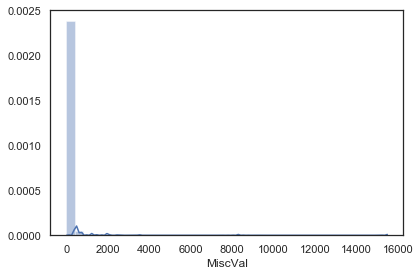

In [64]:
sns.distplot(housing.MiscVal,kde_kws={'bw':0.1})

plt.tight_layout()
plt.show()

In [65]:
##Dropping column MiscVal as it is highly skwed since this is happening as there are 96.30% columns that do not have any misc features

housing.drop(['MiscVal'],axis = 1, inplace = True)

In [66]:
housing.SaleType.value_counts()/len(housing)

##Since there are a few categories with less values lets combine them 

housing['SaleType'].replace(to_replace=['Con','Oth','CWD','ConLw','ConLI'], value = 'Other',inplace=True)

In [67]:
housing.SaleCondition.value_counts()/len(housing)

##Since there are a few categories with less values lets combine them 

housing['SaleCondition'].replace(to_replace=['Alloca','AdjLand'], value = 'Other',inplace=True)

In [68]:
housing.shape

(1451, 60)

In [69]:
##Lets check the datatype of the columns available
housing.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual          int64
ExterCond          int64
Foundation        object
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinType2       int64
TotalBsmtSF        int64
HeatingQC          int64
CentralAir         int64
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64


<b> - Creating Derived variables from year columns </b>

In [70]:
housing['house_age'] = housing['YrSold'] - housing['YearBuilt']
housing['Remodel_age'] = pd.datetime.now().year - housing['YearRemodAdd']
housing['Garage_age'] = pd.datetime.now().year - housing['GarageYrBlt']

In [71]:
##Lets replace value 2020 in Garage_age column as that is due to no garage being availble in those houses
housing.Garage_age.value_counts()
housing['Garage_age'].replace(to_replace=2020.0, value = 0.0,inplace=True)

In [72]:
##Lets drop the columns for which the dummy variables are created 

housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],axis = 1 , inplace = True)

In [73]:
##Lets get the list of categorical columns so as to create dummy variables out of them

catcols = housing.select_dtypes(include = 'object').columns
catcols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical',
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

In [74]:
##Creating the dataframe of only the columns that have categorical data in them
catcolsdf = housing.select_dtypes(include = 'object')

In [75]:
catcolsdf.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Electrical,GarageType,GarageFinish,SaleType,SaleCondition
0,Residentail,Pave,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Attchd,RFn,WD,Normal
1,Residentail,Pave,Reg,Lvl,FR2+FR3,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,SBrkr,Attchd,RFn,WD,Normal
2,Residentail,Pave,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Attchd,RFn,WD,Normal
3,Residentail,Pave,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,SBrkr,Detchd,Unf,WD,Abnorml
4,Residentail,Pave,IR1,Lvl,FR2+FR3,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Attchd,RFn,WD,Normal


In [76]:
catcolsdf_dummy = pd.get_dummies(catcolsdf,drop_first = True)

In [77]:
catcolsdf_dummy.head()

,MSZoning_Residentail,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2+FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_2Story,HouseStyle_Fin,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Car+2Type,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,SaleType_ConLD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [78]:
##Lets drop any dummy variable that has only one value in them
catcolsdf_dummy = dropcolsingleunique(catcolsdf_dummy)

Total Number of Columns dropped : 0


In [79]:
##Concating the dummy variables with the actual dataframe and dropping the original columns from the housing datafram 
##for which we have the created dummy varaibels 

housing = pd.concat([housing, catcolsdf_dummy], axis=1)
housing.drop(catcols,axis =1 , inplace = True)

<b> - Checking for multicollinearity between independent variables</b>

In [80]:
##Lets create a dataframe of all the independent variable
housing_corr = housing.drop(['SalePrice'],axis =1)
corr_matrix = housing_corr.corr().abs()
corr_matrix.shape

(140, 140)

In [81]:
##Checking independnet variables that have a high value for spearmens corelation 
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond',
 'HouseStyle_2Story',
 'RoofStyle_Hip',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_None',
 'GarageType_NG',
 'GarageFinish_NG',
 'SaleCondition_Partial']

In [82]:
##Dropping the columns from the actual dataframe
housing.drop(col_to_drop,axis =1 , inplace = True)

In [83]:
housing.shape

(1451, 125)

In [84]:
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,house_age,Remodel_age,Garage_age,MSZoning_Residentail,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2+FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Fin,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Car+2Type,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_ConLD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other
0,60,65.0,8450,7,5,3,2,4,3,1,6,1,856,5,1,854,1710,1,0,2,1,3,1,3,0,2,3,2,0,61,12.247694,5,17,17.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,20,80.0,9600,6,8,2,2,4,3,5,5,1,1262,5,1,0,1262,0,1,2,0,3,1,2,1,2,3,2,298,0,12.109011,31,44,44.0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,60,68.0,11250,7,5,3,2,4,3,3,6,1,920,5,1,866,1786,1,0,2,1,3,1,3,1,2,3,2,0,42,12.317167,7,18,19.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,70,60.0,9550,7,5,2,2,3,4,1,5,1,756,4,1,756,1717,1,0,1,0,3,1,3,1,3,3,2,0,35,11.849398,91,50,22.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4,60,84.0,14260,8,5,3,2,4,3,4,6,1,1145,5,1,1053,2198,1,0,2,1,4,1,3,1,3,3,2,192,84,12.429216,8,20,20.0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


<b>- Splitting the avilable data into training and testing set </b>

In [85]:
np.random.seed(0)
housing_train, housing_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [86]:
housing_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,house_age,Remodel_age,Garage_age,MSZoning_Residentail,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2+FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Fin,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Car+2Type,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_ConLD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other
801,30,40.0,4800,4,7,2,2,3,3,1,2,1,1196,5,1,0,1196,1,0,1,0,2,1,2,0,2,3,2,0,0,11.607326,91,30,63.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
569,90,69.0,7032,5,5,2,2,4,3,5,6,1,943,3,1,0,943,1,0,1,0,2,1,2,2,2,3,2,42,0,11.820116,27,41,41.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1181,120,64.0,5587,8,5,4,2,5,3,5,6,1,1600,5,1,0,1652,1,1,2,0,2,1,3,1,2,3,2,162,53,12.880292,0,12,12.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
808,80,85.0,13400,5,5,2,2,3,3,4,5,4,1024,3,1,0,1086,1,0,1,0,3,1,2,1,2,3,2,0,0,11.982617,40,54,54.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1095,20,78.0,9317,6,5,3,2,4,3,1,6,1,1314,4,1,0,1314,0,0,2,0,3,1,3,1,2,3,2,0,22,12.080691,1,14,14.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [87]:
housing_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,house_age,Remodel_age,Garage_age,MSZoning_Residentail,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2+FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Fin,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Car+2Type,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_ConLD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other
357,120,44.0,4224,5,5,2,2,4,3,1,5,1,1142,3,1,0,1142,1,0,1,1,3,1,2,1,2,3,2,536,90,11.805595,31,44,44.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
824,20,81.0,11216,8,5,3,2,4,4,1,1,1,1489,5,1,0,1489,0,0,2,0,3,1,3,1,2,3,2,0,140,12.357076,0,14,14.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
369,20,69.0,9830,5,7,2,3,3,3,1,5,3,1063,5,1,0,1287,1,0,1,0,3,1,3,1,2,3,2,364,17,11.995352,51,14,23.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
291,190,55.0,5687,5,6,2,1,3,2,1,3,1,780,5,0,780,1716,1,0,2,0,6,1,1,0,0,0,1,0,184,11.819675,96,20,0.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
134,20,78.0,10335,5,6,2,2,3,3,1,3,1,1461,4,1,0,1721,0,0,2,1,3,1,2,1,2,3,2,0,96,12.100712,38,27,52.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


<b>- Rescaling the Features </b>

In [88]:
scaler = StandardScaler()

In [89]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea','OverallQual','OverallCond','ExterCond','BsmtQual'
            ,'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','HeatingQC','GrLivArea','2ndFlrSF'
            ,'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr'
            ,'Fireplaces','GarageCars','GarageQual','PavedDrive','WoodDeckSF','OpenPorchSF','house_age','Remodel_age'
            ,'Garage_age','SalePrice','ExterQual','KitchenQual']


In [90]:
housing_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       ...
       'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Other', 'SaleType_WD',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Other'],
      dtype='object', length=125)

In [91]:
housing_train[num_vars] = scaler.fit_transform(housing_train[num_vars])

In [92]:
#Getting the X and y variables for train data set
housingy_train = housing_train.pop('SalePrice')
housingX_train = housing_train

In [93]:
housing_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,house_age,Remodel_age,Garage_age,MSZoning_Residentail,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2+FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Fin,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Car+2Type,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_ConLD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other
801,-0.650652,-1.298599,-0.513865,-1.552452,1.293141,-0.701332,-0.268182,-0.623550,0.086984,-0.635925,-0.737893,-0.291620,0.294756,0.843371,1,-0.806741,-0.596512,1.117470,-0.237207,-1.036398,-0.783948,-1.066139,-0.203425,-0.812063,-0.953172,0.300833,0.26243,0.271317,-0.736684,-0.689360,1.842179,-0.238209,0.913505,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
569,0.788676,-0.041883,-0.315476,-0.824292,-0.538734,-0.701332,-0.268182,0.566117,0.086984,2.031282,1.153423,-0.291620,-0.273317,-1.058899,1,-0.806741,-1.065805,1.117470,-0.237207,-1.036398,-0.783948,-1.066139,-0.203425,-0.812063,2.172740,0.300833,0.26243,0.271317,-0.392118,-0.689360,-0.297576,0.301373,0.062039,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1181,1.508340,-0.258558,-0.443913,1.360189,-0.538734,2.796713,-0.268182,1.755784,0.086984,2.031282,1.153423,-0.291620,1.201876,0.843371,1,-0.806741,0.249328,1.117470,4.062174,0.793070,-0.783948,-1.066139,-0.203425,0.705882,0.609784,0.300833,0.26243,0.271317,0.592359,0.074914,-1.200285,-1.121161,-1.060348,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
808,0.548788,0.651477,0.250537,-0.824292,-0.538734,-0.701332,-0.268182,-0.623550,0.086984,1.364480,0.680594,2.973026,-0.091444,-1.058899,1,-0.806741,-0.800552,1.117470,-0.237207,-1.036398,-0.783948,0.176262,-0.203425,-0.812063,0.609784,0.300833,0.26243,0.271317,-0.736684,-0.689360,0.137062,0.939061,0.565178,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1095,-0.89

## Feature Selection using RFE

In [94]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [95]:
# Running RFE with the output number of the variable equal to 60
lm = LinearRegression()
lm.fit(housingX_train, housingy_train)

rfe = RFE(lm, 60)             # running RFE
rfe = rfe.fit(housingX_train, housingy_train)

In [96]:
list(zip(housingX_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 4),
 ('LotFrontage', False, 35),
 ('LotArea', False, 32),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('ExterQual', False, 43),
 ('ExterCond', False, 57),
 ('BsmtQual', False, 10),
 ('BsmtCond', False, 44),
 ('BsmtExposure', False, 23),
 ('BsmtFinType1', True, 1),
 ('BsmtFinType2', False, 62),
 ('TotalBsmtSF', False, 19),
 ('HeatingQC', False, 18),
 ('CentralAir', True, 1),
 ('2ndFlrSF', False, 20),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 7),
 ('BsmtHalfBath', False, 65),
 ('FullBath', False, 21),
 ('HalfBath', False, 22),
 ('BedroomAbvGr', False, 16),
 ('KitchenAbvGr', False, 41),
 ('KitchenQual', False, 11),
 ('Fireplaces', False, 15),
 ('GarageCars', True, 1),
 ('GarageQual', False, 27),
 ('PavedDrive', False, 47),
 ('WoodDeckSF', False, 39),
 ('OpenPorchSF', False, 58),
 ('house_age', False, 53),
 ('Remodel_age', False, 51),
 ('Garage_age', False, 49),
 ('MSZoning_Residentail', True, 1),
 ('Street_Pave', True, 1),
 ('LotShape_IR2', True, 

In [97]:
col = housingX_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinType1', 'CentralAir', 'GrLivArea',
       'GarageCars', 'MSZoning_Residentail', 'Street_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_RRAn',
       'BldgType_Twnhs', 'HouseStyle_Unf', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exte

In [98]:
len(col)

60

In [99]:
# Creating X_test dataframe with RFE selected variables
housingX_train_rfe = housingX_train[col]

In [100]:
housingX_train_rfe.columns

Index(['OverallQual', 'OverallCond', 'BsmtFinType1', 'CentralAir', 'GrLivArea',
       'GarageCars', 'MSZoning_Residentail', 'Street_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_RRAn',
       'BldgType_Twnhs', 'HouseStyle_Unf', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exte

<b>- Ridge Regression </b>

In [101]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(housingX_train_rfe,housingy_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005800,0.001166,0.001802,0.000751,0.0001,{'alpha': 0.0001},-0.279175,-0.236863,-0.233978,-0.255544,-0.235194,-0.248151,0.017397,23,-0.208661,-0.226936,-0.228841,-0.226885,-0.226940,-0.223653,0.007533
1,0.005000,0.000634,0.002201,0.000749,0.001,{'alpha': 0.001},-0.279176,-0.236861,-0.233970,-0.255527,-0.235196,-0.248146,0.017397,22,-0.208661,-0.226935,-0.228840,-0.226884,-0.226941,-0.223652,0.007533
2,0.005801,0.000748,0.002200,0.000398,0.01,{'alpha': 0.01},-0.279189,-0.236845,-0.233891,-0.255364,-0.235219,-0.248102,0.017400,21,-0.208660,-0.226927,-0.228836,-0.226881,-0.226943,-0.223650,0.007532
3,0.005204,0.000986,0.002195,0.000404,0.05,{'alpha': 0.05},-0.279243,-0.236809,-0.233551,-0.254666,-0.235316,-0.247917,0.017409,20,-0.208656,-0.226902,-0.228822,-0.226867,-0.226955,-0.223640,0.007529
4,0.005600,0.001018,0.002200,0.000399,0.1,{'alpha': 0.1},-0.279301,-0.236868,-0.233150,-0.253835,-0.235428,-0.247716,0.017412,19,-0.208660,-0.226882,-0.228816,-0.226846,-0.226967,-0.223634,0.007524


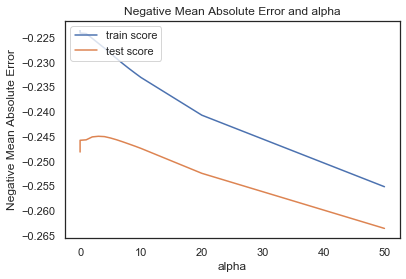

In [103]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [104]:
model_cv.best_params_

{'alpha': 3.0}

In [105]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(housingX_train_rfe,housingy_train)
ridge.coef_

array([ 2.53229820e-01,  1.16558184e-01,  1.20148414e-01,  2.32628602e-01,
        3.60890356e-01,  1.96696345e-01,  6.74286023e-01, -1.27213492e-01,
        1.00229698e-01, -1.24137330e-01,  2.55516254e-01,  2.87837727e-01,
        1.43182565e-01,  1.51216764e-01, -1.80667335e-01, -2.29102047e-01,
       -3.64221358e-02,  1.62508632e-01,  2.16544300e-01, -1.93499385e-01,
       -3.50861728e-01, -4.60824693e-01, -1.16965645e-01, -5.66993384e-02,
       -2.12429610e-01, -9.37071474e-02,  1.42501677e-01,  3.53484307e-01,
       -2.85321669e-01,  1.38242141e-01,  2.50892643e-01,  1.85865827e-01,
        1.88782595e-01,  9.30134502e-02, -2.83520591e-01,  6.41754944e-02,
        3.30232679e-01,  6.03716378e-02,  1.47542429e-04,  7.66298010e-02,
        9.84053396e-02,  1.73808536e-02,  1.09301215e-01,  2.25348870e-02,
        9.31385455e-02, -2.15477411e-01, -1.01174884e-01,  9.37414920e-02,
        1.46203819e-01, -1.31079014e-01,  7.69074037e-02, -1.13578968e-01,
       -8.26843566e-02, -

In [106]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

cols = housingX_train_rfe.loc[:, housingX_train_rfe.columns != 'SalePrice'].columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))

In [107]:
var_coeff

[('constant', -1.391),
 ('OverallQual', 0.253),
 ('OverallCond', 0.117),
 ('BsmtFinType1', 0.12),
 ('CentralAir', 0.233),
 ('GrLivArea', 0.361),
 ('GarageCars', 0.197),
 ('MSZoning_Residentail', 0.674),
 ('Street_Pave', -0.127),
 ('LotShape_IR2', 0.1),
 ('LotShape_IR3', -0.124),
 ('LandContour_HLS', 0.256),
 ('LandContour_Low', 0.288),
 ('LandContour_Lvl', 0.143),
 ('LotConfig_CulDSac', 0.151),
 ('Neighborhood_Blueste', -0.181),
 ('Neighborhood_BrDale', -0.229),
 ('Neighborhood_BrkSide', -0.036),
 ('Neighborhood_ClearCr', 0.163),
 ('Neighborhood_Crawfor', 0.217),
 ('Neighborhood_Edwards', -0.193),
 ('Neighborhood_IDOTRR', -0.351),
 ('Neighborhood_MeadowV', -0.461),
 ('Neighborhood_Mitchel', -0.117),
 ('Neighborhood_NAmes', -0.057),
 ('Neighborhood_NPkVill', -0.212),
 ('Neighborhood_NWAmes', -0.094),
 ('Neighborhood_NoRidge', 0.143),
 ('Neighborhood_NridgHt', 0.353),
 ('Neighborhood_OldTown', -0.285),
 ('Neighborhood_Somerst', 0.138),
 ('Neighborhood_StoneBr', 0.251),
 ('Neighborhood_Ve

In [108]:
##Lets predict on the training dataset and check  R-Square for the train dataset
y_pred_ridge_train = ridge.predict(housingX_train_rfe)

In [109]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(housingy_train, y_pred_ridge_train))

r2_score in train dataset
r2_score for ridge: 0.894830798881918


<b>- Lasso Regression </b>

In [110]:
# grid search CV

# specify range of hyperparameters
params_lasso = {'alpha': [0.00001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004]}

# grid search
# lasso model
model = Lasso()
folds = 5
model_cv_lasso = GridSearchCV(estimator = model, param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv_lasso.fit(housingX_train_rfe, housingy_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [111]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016399,0.001204,0.002202,0.000401,1e-05,{'alpha': 1e-05},-0.279251,-0.236786,-0.233790,-0.255346,-0.235238,-0.248082,0.017442,11,-0.208650,-0.226912,-0.228820,-0.226856,-0.226968,-0.223641,0.007532
1,0.009798,0.002135,0.001799,0.000398,0.0001,{'alpha': 0.0001},-0.279951,-0.236526,-0.232313,-0.253677,-0.235780,-0.247649,0.017774,10,-0.208668,-0.226927,-0.228768,-0.226620,-0.227238,-0.223644,0.007524
2,0.009999,0.001414,0.002200,0.000749,0.0002,{'alpha': 0.0002},-0.280754,-0.236557,-0.231413,-0.251699,-0.236640,-0.247413,0.017999,9,-0.209198,-0.227314,-0.228802,-0.226431,-0.227595,-0.223868,0.007374
3,0.007201,0.002040,0.002199,0.000748,0.0003,{'alpha': 0.0003},-0.281768,-0.236644,-0.230909,-0.249697,-0.237245,-0.247253,0.018315,8,-0.210216,-0.227590,-0.228692,-0.226462,-0.228009,-0.224194,0.007027
4,0.007199,0.000399,0.002401,0.000798,0.0004,{'alpha': 0.0004},-0.282251,-0.236483,-0.231162,-0.248471,-0.237859,-0.247245,0.018382,7,-0.210982,-0.227779,-0.228818,-0.226672,-0.228137,-0.224477,0.006784


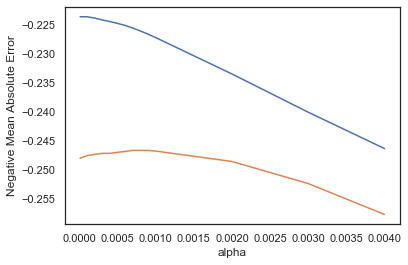

In [112]:
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.tight_layout
plt.show()

In [113]:
model_cv_lasso.best_params_

{'alpha': 0.0008}

In [114]:
# model with optimal alpha
# lasso regression

lm = Lasso(alpha=0.0008)
lm.fit(housingX_train[col], housingy_train)

# predict
y_train_pred = lm.predict(housingX_train_rfe)
print(r2_score(y_true=housingy_train, y_pred=y_train_pred))


0.8940876991120577


In [115]:
# lasso model parameters
model_parameters_lasso = list(lm.coef_)
model_parameters_lasso.insert(0, lm.intercept_)
model_parameters_lasso = [round(x, 3) for x in model_parameters_lasso]

cols_lasso = housingX_train_rfe.loc[:, housingX_train_rfe.columns != 'SalePrice'].columns
cols_lasso = cols_lasso.insert(0, "constant")
var_coeff_lasso = list(zip(cols_lasso, model_parameters_lasso))

In [116]:
var_coeff_lasso_final = [x for x in var_coeff_lasso if abs(x[1] != 0)]
var_coeff_lasso_final

[('constant', -1.589),
 ('OverallQual', 0.254),
 ('OverallCond', 0.116),
 ('BsmtFinType1', 0.121),
 ('CentralAir', 0.224),
 ('GrLivArea', 0.36),
 ('GarageCars', 0.198),
 ('MSZoning_Residentail', 0.91),
 ('Street_Pave', -0.107),
 ('LotShape_IR2', 0.08),
 ('LotShape_IR3', -0.074),
 ('LandContour_HLS', 0.243),
 ('LandContour_Low', 0.297),
 ('LandContour_Lvl', 0.13),
 ('LotConfig_CulDSac', 0.152),
 ('Neighborhood_Blueste', -0.029),
 ('Neighborhood_BrDale', -0.2),
 ('Neighborhood_BrkSide', -0.007),
 ('Neighborhood_ClearCr', 0.146),
 ('Neighborhood_Crawfor', 0.216),
 ('Neighborhood_Edwards', -0.184),
 ('Neighborhood_IDOTRR', -0.308),
 ('Neighborhood_MeadowV', -0.484),
 ('Neighborhood_Mitchel', -0.104),
 ('Neighborhood_NAmes', -0.044),
 ('Neighborhood_NPkVill', -0.168),
 ('Neighborhood_NWAmes', -0.07),
 ('Neighborhood_NoRidge', 0.131),
 ('Neighborhood_NridgHt', 0.358),
 ('Neighborhood_OldTown', -0.274),
 ('Neighborhood_Somerst', 0.138),
 ('Neighborhood_StoneBr', 0.248),
 ('Neighborhood_Veenke

In [117]:
len(var_coeff_lasso_final)

57

In [118]:
##Lets work on test data 
num_vars_test = ['MSSubClass', 'LotFrontage', 'LotArea','OverallQual','OverallCond','ExterCond','BsmtQual'
            ,'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','HeatingQC','GrLivArea','2ndFlrSF'
            ,'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr'
            ,'Fireplaces','GarageCars','GarageQual','PavedDrive','WoodDeckSF','OpenPorchSF','house_age','Remodel_age'
            ,'Garage_age','SalePrice','ExterQual','KitchenQual']



In [119]:
housing_test[num_vars_test].head()

housing_test[num_vars_test] = scaler.transform(housing_test[num_vars_test])

In [120]:
housing_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,house_age,Remodel_age,Garage_age,MSZoning_Residentail,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2+FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_Fin,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_Car+2Type,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_ConLD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other
357,1.508340,-1.125258,-0.565062,-0.824292,-0.538734,-0.701332,-0.268182,0.566117,0.086984,-0.635925,0.680594,-0.291620,0.173507,-1.058899,1,-0.806741,-0.696677,1.117470,-0.237207,-1.036398,1.215316,0.176262,-0.203425,-0.812063,0.609784,0.300833,0.262430,0.271317,3.660645,0.608464,-0.552961,-0.163841,0.448532,0.178148,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
824,-0.890540,0.478137,0.056414,1.360189,-0.538734,1.047691,-0.268182,0.566117,2.093548,-0.635925,-1.210721,-0.291620,0.952643,0.843371,1,-0.806741,-0.053023,-0.792011,-0.237207,0.793070,-0.783948,0.176262,-0.203425,0.705882,0.609784,0.300833,0.262430,0.271317,-0.736684,1.329477,0.824755,-1.200285,-1.023055,-0.982942,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
369,-0.890540,-0.041883,-0.066779,-0.824292,1.293141,-0.701332,2.658750,-0.623550,0.086984,-0.635925,0.680594,1.884811,-0.003876,0.843371,1,-0.806741,-0.427715,1.117470,-0.237207,-1.036398,-0.783948,0.176262,-0.203425,0.705882,0.609784,0.300833,0.262430,0.271317,2.249562,-0.444215,-0.078909,0.504832,-1.023055,-0.634615,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
291,3.187555,-0.648573,-0.435025,-0.824292,0.377204,-0.701332,-3.195114,-0.623550,-1.919580,-0.635925,-0.265064,-0.291620,-0.639309,0.843371,0,0.975571,0.368042,1.117470,-0.237207,0.793070,-0.783948,3.903466,-0.203425,-2.330008,-0.953172,-2.413347,-3.943355,-2.538754,-0.736684,1.963969,-0.517788,2.009347,-0.728738,-1.524784,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [121]:
housingy_test = housing_test.pop('SalePrice')

housingX_test = housing_test

In [122]:
housingX_test = housingX_test[col]

In [123]:
print('r2_score & Rmse for Ridge Regression\n')
print('r2_score for train dataset')
print( r2_score(housingy_train, y_pred_ridge_train),'\n')
print('Mse for train dataset')
print(mean_squared_error(housingy_train,y_pred_ridge_train),'\n')

y_pred_test = ridge.predict(housingX_test)

print('r2_score for test dataset')
print(r2_score(housingy_test,y_pred_test),'\n')
print('Mse for test dataset')
print(mean_squared_error(housingy_test,y_pred_test))  

r2_score & Rmse for Ridge Regression

r2_score for train dataset
0.894830798881918 

Mse for train dataset
0.10516920111808198 

r2_score for test dataset
0.8674617944673619 

Mse for test dataset
0.13037578646272974


In [124]:
print('r2_score & Rmse in Lasso Regression\n')
print('r2_score for train dataset')
y_train_pred = lm.predict(housingX_train_rfe)
print(r2_score(y_true=housingy_train, y_pred=y_train_pred),'\n')
print('Mse for train dataset')
print(mean_squared_error(housingy_train,y_train_pred),'\n')

y_test_pred_lasso = lm.predict(housingX_test)

print('r2_score for test dataset')
print(r2_score(y_true=housingy_test, y_pred=y_test_pred_lasso),'\n')
print('Mse for test dataset')
print(mean_squared_error(housingy_test,y_test_pred_lasso))     
      

r2_score & Rmse in Lasso Regression

r2_score for train dataset
0.8940876991120577 

Mse for train dataset
0.10591230088794239 

r2_score for test dataset
0.8657205248042035 

Mse for test dataset
0.132088646546097


In [125]:
lasso_param = model_cv_lasso.best_params_

Ridge_param = model_cv.best_params_

In [126]:
print('Optimum Value for alpha - Ridge Regression : {}\n'.format(Ridge_param['alpha']))

print('Optimum Value for alpha - Lasso Regression : {}'.format(lasso_param['alpha']))

Optimum Value for alpha - Ridge Regression : 3.0

Optimum Value for alpha - Lasso Regression : 0.0008


<b>- Top 10 Features </b>

In [127]:
##Top 10 Features per ridge regression
ridge_df = pd.DataFrame(var_coeff)
ridge_df.columns = ['feature_name' , 'coeff']
ridge_df['abs_coeff'] = abs(ridge_df.coeff)
ridge_df[ridge_df['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(10)

,feature_name,coeff,abs_coeff
7,MSZoning_Residentail,0.674,0.674
22,Neighborhood_MeadowV,-0.461,0.461
5,GrLivArea,0.361,0.361
28,Neighborhood_NridgHt,0.353,0.353
21,Neighborhood_IDOTRR,-0.351,0.351
56,SaleType_New,0.343,0.343
37,Exterior1st_BrkFace,0.330,0.330
12,LandContour_Low,0.288,0.288
29,Neighborhood_OldTown,-0.285,0.285
35,BldgType_Twnhs,-0.284,0.284


In [128]:
##Top 10 Features per lasso regression
lasso_df = pd.DataFrame(var_coeff_lasso)
lasso_df.columns = ['feature_name' , 'coeff']
lasso_df['abs_coeff'] = abs(lasso_df.coeff)
lasso_df[lasso_df['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(10)

,feature_name,coeff,abs_coeff
7,MSZoning_Residentail,0.910,0.910
22,Neighborhood_MeadowV,-0.484,0.484
5,GrLivArea,0.360,0.360
28,Neighborhood_NridgHt,0.358,0.358
56,SaleType_New,0.340,0.340
21,Neighborhood_IDOTRR,-0.308,0.308
12,LandContour_Low,0.297,0.297
37,Exterior1st_BrkFace,0.295,0.295
35,BldgType_Twnhs,-0.290,0.290
29,Neighborhood_OldTown,-0.274,0.274


Since Lasso will penalize more on the dataset and has eliminated 4 more features lets consider the above 10 features which provide us with below inferences.

- Houses being in Residential Zoning areas seem to have a positive effect on the  selling price
- Houses in Neighbourhood MeadowV ,IDOTRR , OldTown have a negative effect on the selling price
- Houses in Northridge Heights have a positive effect on the  selling price
- New Houses seem to selling at higher prices
- End unit Townhouses are being sold at lower price
- Houses with Brick face exterior coverings are sold at higher prices

<b>- Actual vs Predicted </b>

Text(0, 0.5, 'y_pred')

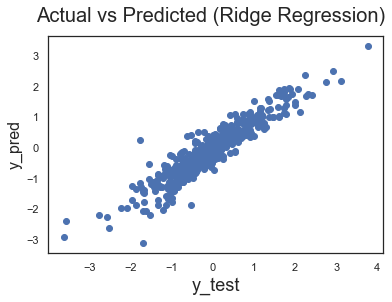

In [129]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(housingy_test, y_pred_test )
fig.suptitle('Actual vs Predicted (Ridge Regression)', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Text(0, 0.5, 'y_pred')

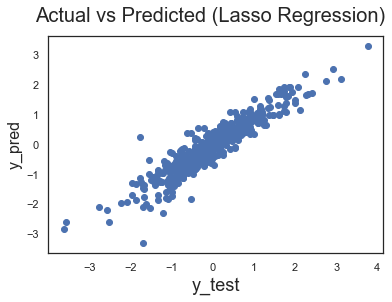

In [130]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(housingy_test, y_test_pred_lasso )
fig.suptitle('Actual vs Predicted (Lasso Regression)', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

<b>- Residual Analysis </b>

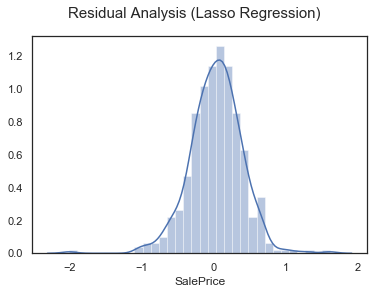

In [131]:
reslasso = housingy_test - y_test_pred_lasso

fig = plt.figure()
sns.distplot(reslasso)
fig.suptitle('Residual Analysis (Lasso Regression)', fontsize = 15) 
plt.tight_layout
plt.show()


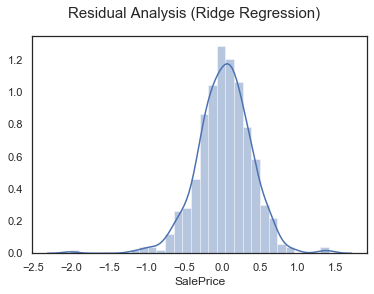

In [132]:
resridge = housingy_test - y_pred_test


fig = plt.figure()
sns.distplot(resridge)
fig.suptitle('Residual Analysis (Ridge Regression)', fontsize = 15) 
plt.tight_layout
plt.show()

<b> - Problem Statement Part II </b>

Q1) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [133]:
##ridge regression

alphadob = 6
ridgedob = Ridge(alpha=alphadob)

ridgedob.fit(housingX_train_rfe,housingy_train)
ridgedob.coef_

array([ 0.26630235,  0.11737871,  0.12136261,  0.23241796,  0.35723198,
        0.19970315,  0.49177388, -0.06091928,  0.09339817, -0.10068023,
        0.20796144,  0.23480721,  0.10699587,  0.15133336, -0.10992612,
       -0.17110992, -0.01707375,  0.1566682 ,  0.20832034, -0.16805613,
       -0.3279651 , -0.35633477, -0.09801766, -0.03936865, -0.16081352,
       -0.08106841,  0.1208991 ,  0.32564053, -0.26294555,  0.12901499,
        0.21508323,  0.15462882,  0.18067047,  0.06825373, -0.27867374,
        0.04099851,  0.28517254,  0.01147665, -0.01768646,  0.05049181,
        0.07650412, -0.02629224,  0.08611195, -0.00660781,  0.05141688,
       -0.18177966, -0.08018431,  0.09001344,  0.15144462, -0.10313997,
        0.04337566, -0.07868843, -0.04917016, -0.14239661, -0.16038541,
        0.31920374,  0.19529492,  0.19554896,  0.19293882,  0.10489514])

Coeff values donot seem to have a major change as compared to model which has alpha set to 3

In [134]:
model_parametersdob = list(ridgedob.coef_)
model_parametersdob.insert(0, ridgedob.intercept_)
model_parametersdob = [round(x, 3) for x in model_parametersdob]

colsdob = housingX_train_rfe.loc[:, housingX_train_rfe.columns != 'SalePrice'].columns
colsdob = colsdob.insert(0, "constant")
var_coeffdob = list(zip(colsdob, model_parametersdob))

In [135]:
y_pred_ridge_traindob = ridgedob.predict(housingX_train_rfe)

In [136]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(housingy_train, y_pred_ridge_traindob))
print('Mse for test dataset')
print(mean_squared_error(housingy_train,y_pred_ridge_traindob)) 

r2_score in train dataset
r2_score for ridge: 0.8917325911409119
Mse for test dataset
0.10826740885908813


In [137]:
y_pred_testdob = ridgedob.predict(housingX_test)

In [138]:
print(r2_score(y_true=housingy_test, y_pred=y_pred_testdob),'\n')
print('Mse for test dataset')
print(mean_squared_error(housingy_test,y_pred_testdob))     

0.8691301219384301 

Mse for test dataset
0.12873467848753292


In [139]:
##Top 10 Features per ridge regression after doubling lambda
ridge_dfdob = pd.DataFrame(var_coeffdob)
ridge_dfdob.columns = ['feature_name' , 'coeff']
ridge_dfdob['abs_coeff'] = abs(ridge_dfdob.coeff)
ridge_dfdob[ridge_dfdob['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(10)

,feature_name,coeff,abs_coeff
7,MSZoning_Residentail,0.492,0.492
5,GrLivArea,0.357,0.357
22,Neighborhood_MeadowV,-0.356,0.356
21,Neighborhood_IDOTRR,-0.328,0.328
28,Neighborhood_NridgHt,0.326,0.326
56,SaleType_New,0.319,0.319
37,Exterior1st_BrkFace,0.285,0.285
35,BldgType_Twnhs,-0.279,0.279
1,OverallQual,0.266,0.266
29,Neighborhood_OldTown,-0.263,0.263


In [140]:
# lasso regression

lmdob = Lasso(alpha=0.0016)
lmdob.fit(housingX_train_rfe, housingy_train)

# predict
y_train_preddob = lmdob.predict(housingX_train_rfe)
print(r2_score(y_true=housingy_train, y_pred=y_train_preddob))

0.8886537696115071


In [141]:
# lasso model parameters
model_parameters_lassodob = list(lmdob.coef_)
model_parameters_lassodob.insert(0, lmdob.intercept_)
model_parameters_lassodob = [round(x, 3) for x in model_parameters_lassodob]

cols_lassodob = housingX_train_rfe.loc[:, housingX_train_rfe.columns != 'SalePrice'].columns
cols_lassodob = cols_lassodob.insert(0, "constant")
var_coeff_lassodob = list(zip(cols_lassodob, model_parameters_lassodob))

In [142]:
var_coeff_lasso_finaldob = [x for x in var_coeff_lassodob if abs(x[1] != 0)]
len(var_coeff_lasso_finaldob)

48

In [143]:
y_test_pred_lassodob = lmdob.predict(housingX_test)

print('r2_score for test dataset')
print(r2_score(y_true=housingy_test, y_pred=y_test_pred_lassodob),'\n')
print('Mse for test dataset')
print(mean_squared_error(housingy_test,y_test_pred_lassodob))     

r2_score for test dataset
0.8674974509245397 

Mse for test dataset
0.13034071175632087


In [144]:
##Top 10 Features per lasso regression
lasso_dfdob = pd.DataFrame(var_coeff_lassodob)
lasso_dfdob.columns = ['feature_name' , 'coeff']
lasso_dfdob['abs_coeff'] = abs(lasso_dfdob.coeff)
lasso_dfdob[lasso_dfdob['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(10)

,feature_name,coeff,abs_coeff
7,MSZoning_Residentail,0.721,0.721
5,GrLivArea,0.356,0.356
22,Neighborhood_MeadowV,-0.350,0.350
28,Neighborhood_NridgHt,0.331,0.331
35,BldgType_Twnhs,-0.313,0.313
56,SaleType_New,0.297,0.297
21,Neighborhood_IDOTRR,-0.282,0.282
1,OverallQual,0.270,0.270
37,Exterior1st_BrkFace,0.269,0.269
29,Neighborhood_OldTown,-0.249,0.249


Q3) After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [145]:
##lets drop the top5 features from the train and test datasets and rebuild the model
housingX_trainnewdf = housingX_train_rfe
housingX_trainnewdf.drop(['MSZoning_Residentail','Neighborhood_MeadowV','GrLivArea','Neighborhood_NridgHt','Neighborhood_IDOTRR'],axis =1 , inplace = True)

housingX_testnewdf = housingX_test
housingX_testnewdf.drop(['MSZoning_Residentail','Neighborhood_MeadowV','GrLivArea','Neighborhood_NridgHt','Neighborhood_IDOTRR'],axis =1 , inplace = True)

In [146]:
# grid search CV

# specify range of hyperparameters
params_lassonew = {'alpha': [0.00001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004]}

# grid search
# lasso model
model = Lasso()
folds = 5
model_cv_lassonew = GridSearchCV(estimator = model, param_grid = params_lassonew, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv_lassonew.fit(housingX_trainnewdf, housingy_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [147]:
cv_results_lassonew = pd.DataFrame(model_cv_lassonew.cv_results_)
cv_results_lassonew.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012798,0.001940,0.002002,0.000631,1e-05,{'alpha': 1e-05},-0.361691,-0.353311,-0.337370,-0.372943,-0.326126,-0.350288,0.016752,14,-0.316783,-0.318632,-0.321655,-0.314098,-0.322719,-0.318777,0.003153
1,0.008799,0.002400,0.001400,0.000490,0.0001,{'alpha': 0.0001},-0.360837,-0.352231,-0.336136,-0.370211,-0.325388,-0.348961,0.016269,13,-0.316728,-0.318637,-0.321682,-0.314072,-0.322920,-0.318808,0.003223
2,0.005401,0.001022,0.001600,0.000490,0.0002,{'alpha': 0.0002},-0.359898,-0.351038,-0.335087,-0.367985,-0.324658,-0.347733,0.015884,12,-0.316768,-0.318721,-0.321857,-0.314145,-0.323252,-0.318949,0.003312
3,0.007000,0.001098,0.001798,0.000750,0.0003,{'alpha': 0.0003},-0.358983,-0.349830,-0.334107,-0.366097,-0.323741,-0.346552,0.015636,11,-0.316863,-0.318933,-0.322100,-0.314358,-0.323647,-0.319180,0.003381
4,0.007399,0.001019,0.002601,0.000491,0.0004,{'alpha': 0.0004},-0.358108,-0.348617,-0.333253,-0.364310,-0.323039,-0.345465,0.015343,10,-0.317049,-0.319167,-0.322310,-0.314743,-0.324097,-0.319473,0.003399


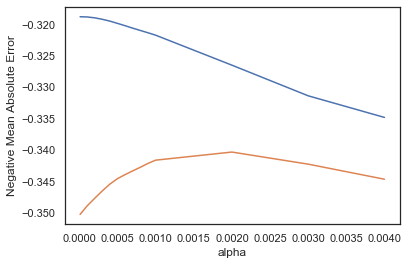

In [148]:
cv_results_lassonew['param_alpha'] = cv_results_lassonew['param_alpha'].astype('float32')
plt.plot(cv_results_lassonew['param_alpha'], cv_results_lassonew['mean_train_score'])
plt.plot(cv_results_lassonew['param_alpha'], cv_results_lassonew['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.tight_layout
plt.show()

In [149]:
model_cv_lassonew.best_params_

{'alpha': 0.002}

In [150]:
# model with optimal alpha as 0.0008
# lasso regression

lmnew = Lasso(alpha=0.002)
lmnew.fit(housingX_trainnewdf, housingy_train)
# predict
y_train_prednew = lmnew.predict(housingX_trainnewdf)
print(r2_score(y_true=housingy_train, y_pred=y_train_prednew))


0.8122072216032481


In [151]:
y_test_pred_lassonew = lmnew.predict(housingX_testnewdf)
print(r2_score(y_true=housingy_test, y_pred=y_test_pred_lassonew))


0.8030628785388669


In [152]:
model_parameters_lassonew = list(lmnew.coef_)
model_parameters_lassonew.insert(0, lmnew.intercept_)
model_parameters_lassonew = [round(x, 3) for x in model_parameters_lassonew]

cols_lassonew = housingX_trainnewdf.loc[:, housingX_trainnewdf.columns != 'SalePrice'].columns
cols_lassonew = cols_lassonew.insert(0, "constant")
var_coeff_lassonew = list(zip(cols_lassonew, model_parameters_lassonew))

In [153]:
##Top 5 Features per new lasso regression model
lasso_dfdobnew = pd.DataFrame(var_coeff_lassonew)
lasso_dfdobnew.columns = ['feature_name' , 'coeff']
lasso_dfdobnew['abs_coeff'] = abs(lasso_dfdobnew.coeff)
lasso_dfdobnew[lasso_dfdobnew['feature_name']!= 'constant'].sort_values(by = 'abs_coeff',ascending=False).head(5)

,feature_name,coeff,abs_coeff
1,OverallQual,0.510,0.510
23,Neighborhood_NoRidge,0.400,0.400
16,Neighborhood_ClearCr,0.386,0.386
51,SaleType_New,0.381,0.381
32,Exterior1st_BrkFace,0.369,0.369
